In [1]:
pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats

# Import API key
from config import weatherPy_apiKey

# Incorporated citipy to determine city based on latitude and longitude

from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
print(weatherPy_apiKey)

54f6f5bb1a7c4610462289caa0693a66


In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create an empty list to store JSON responses
response_json = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

In [5]:
# Build query URL
queryUrl = "http://api.openweathermap.org/data/2.5/weather?" + "appid=" + weatherPy_apiKey + "&q="

In [6]:
# creating dataframe wtih test_cities
test_cities = ['acapulco', 'jamestown', 'dali', 'malatya', 'manila', 'pevek', 'cidreira']
responses = []
city_name = []
latitude = []
longitude = []
temperature = []
humidity = []
clouds = []
wind = []

index = 1
for city in cities:
    weather_data = requests.get(queryUrl + city).json()
    responses.append(weather_data)
    try:
        city_name.append(weather_data['name'])
        latitude.append(weather_data['coord']['lat'])
        longitude.append(weather_data['coord']['lon'])
        temperature.append(weather_data['main']['temp'])
        humidity.append(weather_data['main']['humidity'])
        clouds.append(weather_data['clouds']['all'])
        wind.append(weather_data['wind']['speed'])
        print(f'Record {index} | {city} found')
        index += 1
    except:
        print(f'Record {index} | **{city} not found**')
        index += 1
        pass

Record 1 | bluff found
Record 2 | **barentsburg not found**
Record 3 | cherskiy found
Record 4 | asosa found
Record 5 | **illoqqortoormiut not found**
Record 6 | ushuaia found
Record 7 | yendi found
Record 8 | upernavik found
Record 9 | east london found
Record 10 | bredasdorp found
Record 11 | castro found
Record 12 | kaeo found
Record 13 | pemangkat found
Record 14 | ndele found
Record 15 | vaini found
Record 16 | albany found
Record 17 | hilo found
Record 18 | **belushya guba not found**
Record 19 | luanda found
Record 20 | harper found
Record 21 | oxford found
Record 22 | **warqla not found**
Record 23 | port-cartier found
Record 24 | mollendo found
Record 25 | jalu found
Record 26 | ponta do sol found
Record 27 | atuona found
Record 28 | isangel found
Record 29 | kapaa found
Record 30 | pitimbu found
Record 31 | tucurui found
Record 32 | dingle found
Record 33 | qaanaaq found
Record 34 | banda aceh found
Record 35 | riyadh found
Record 36 | **bokspits not found**
Record 37 | rikit

Record 287 | acara found
Record 288 | sur found
Record 289 | ambulu found
Record 290 | ayan found
Record 291 | klichka found
Record 292 | boende found
Record 293 | preobrazheniye found
Record 294 | te anau found
Record 295 | puerto rondon found
Record 296 | adrar found
Record 297 | **sorvag not found**
Record 298 | srednekolymsk found
Record 299 | bathsheba found
Record 300 | asau found
Record 301 | **satitoa not found**
Record 302 | sivaki found
Record 303 | hambantota found
Record 304 | rawson found
Record 305 | jiaozuo found
Record 306 | bulgan found
Record 307 | sao filipe found
Record 308 | mastic beach found
Record 309 | coihaique found
Record 310 | sioux lookout found
Record 311 | kadyy found
Record 312 | batemans bay found
Record 313 | muisne found
Record 314 | tres arroyos found
Record 315 | talnakh found
Record 316 | chuguyevka found
Record 317 | colesberg found
Record 318 | faanui found
Record 319 | codrington found
Record 320 | vao found
Record 321 | georgetown found
Record

Record 576 | dejen found
Record 577 | **chorbog not found**
Record 578 | gorom-gorom found
Record 579 | nayoro found
Record 580 | bayonne found
Record 581 | nisshin found
Record 582 | balikpapan found
Record 583 | mae chan found
Record 584 | minab found
Record 585 | staryy nadym found
Record 586 | la macarena found
Record 587 | boda found
Record 588 | qaqortoq found
Record 589 | malatya found
Record 590 | chute-aux-outardes found
Record 591 | iznik found
Record 592 | puri found
Record 593 | liepaja found
Record 594 | fare found
Record 595 | **qabis not found**
Record 596 | thika found
Record 597 | dudinka found
Record 598 | yorosso found
Record 599 | vaitape found
Record 600 | anaco found
Record 601 | santa clara found
Record 602 | atherton found
Record 603 | **barbar not found**
Record 604 | sembakung found
Record 605 | mayo found
Record 606 | praia found
Record 607 | freeport found
Record 608 | bakchar found
Record 609 | **halalo not found**
Record 610 | alihe found
Record 611 | kirk

In [7]:
#print(responses)

In [8]:
weather_df = pd.DataFrame({
    'City': city_name,
    'Latitude': latitude,
    'Longitude': longitude,
    'Temperature': temperature,
    'Humidity': humidity,
    'Cloudiness': clouds,
    'Wind (MPH)': wind
})

weather_df

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind (MPH)
0,Bluff,-46.6000,168.3333,287.59,81,56,4.02
1,Cherskiy,68.7500,161.3000,254.54,86,30,2.31
2,Āsosa,10.0667,34.5333,296.79,18,44,0.31
3,Ushuaia,-54.8000,-68.3000,280.15,93,40,2.06
4,Yendi,9.4427,-0.0099,300.88,65,29,3.53
...,...,...,...,...,...,...,...
570,Shahrud,36.4182,54.9763,289.48,23,19,0.93
571,Zhangjiakou,40.8100,114.8794,288.36,16,0,2.63
572,Souillac,-20.5167,57.5167,299.15,83,40,1.03
573,Coxim,-18.5067,-54.7600,295.24,91,97,1.24


In [9]:
# function to convert 'Temperature' column from Kelvin to Farenheit
def Kelvin_to_Farenheit(kelvin):
    farenheit = (kelvin-273.15)*(9/5)+32
    return farenheit

In [10]:
weather_df['Temperature'] = Kelvin_to_Farenheit(weather_df['Temperature'])
weather_df

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind (MPH)
0,Bluff,-46.6000,168.3333,57.992,81,56,4.02
1,Cherskiy,68.7500,161.3000,-1.498,86,30,2.31
2,Āsosa,10.0667,34.5333,74.552,18,44,0.31
3,Ushuaia,-54.8000,-68.3000,44.600,93,40,2.06
4,Yendi,9.4427,-0.0099,81.914,65,29,3.53
...,...,...,...,...,...,...,...
570,Shahrud,36.4182,54.9763,61.394,23,19,0.93
571,Zhangjiakou,40.8100,114.8794,59.378,16,0,2.63
572,Souillac,-20.5167,57.5167,78.800,83,40,1.03
573,Coxim,-18.5067,-54.7600,71.762,91,97,1.24


In [11]:
weather_df.dtypes

City            object
Latitude       float64
Longitude      float64
Temperature    float64
Humidity         int64
Cloudiness       int64
Wind (MPH)     float64
dtype: object

##### Analysis of 'Temperature (Farenheit) v. Latitude'

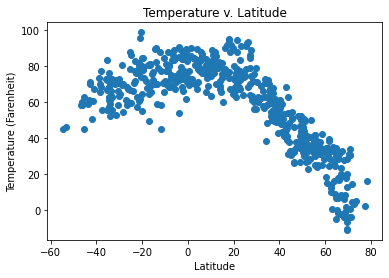

In [12]:
# Scatter Plot - Temperature (Farenheit) v. Latitude
x_values = weather_df['Latitude']
y_values = weather_df['Temperature']
plt.scatter(x_values, y_values)
plt.title('Temperature v. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Temperature (Farenheit)')
plt.savefig(f'visualizations/TempLat.png')
plt.show()

##### Analysis of 'Humidity (%) v. Latitude'


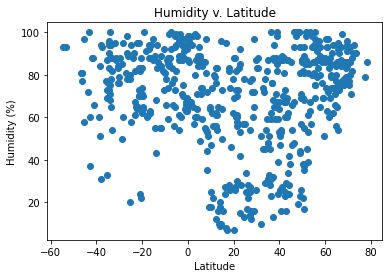

In [13]:
# Scatter Plot - Humidity (%) v. Latitude
x_values = weather_df['Latitude']
y_values = weather_df['Humidity']
plt.scatter(x_values, y_values)
plt.title('Humidity v. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig(f'visualizations/HumLat.png')
plt.show()

##### Analysis of 'Cloudiness(%) v. Latitude'


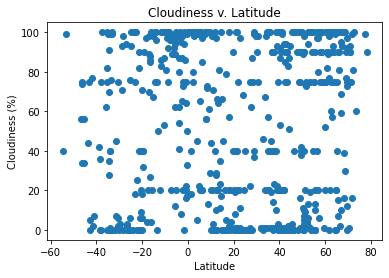

In [14]:
# Scatter Plot - Cloudiness (%) v. Latitude
x_values = weather_df['Latitude']
y_values = weather_df['Cloudiness']
plt.scatter(x_values, y_values)
plt.title('Cloudiness v. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig(f'visualizations/CloudLat.png')
plt.show()

##### Analysis of  'Wind Speed (mph) v. Latitude'


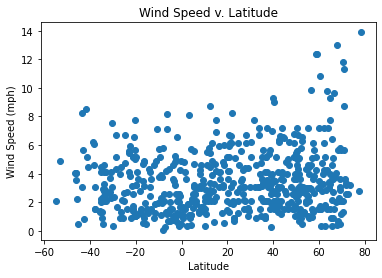

In [15]:
# Scatter Plot - Wind Speed (mph)) v. Latitude
x_values = weather_df['Latitude']
y_values = weather_df['Wind (MPH)']
plt.scatter(x_values, y_values)
plt.title('Wind Speed v. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig(f'visualizations/WindLat.png')
plt.show()

### Linear Regressions: Northern Hemisphere v. Southern Hemisphere

In [16]:
# Northern Hemisphere Data Frame
northWeather_df = weather_df.loc[(
    weather_df['Latitude'] >= 0)]
northWeather_df

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind (MPH)
1,Cherskiy,68.7500,161.3000,-1.498,86,30,2.31
2,Āsosa,10.0667,34.5333,74.552,18,44,0.31
4,Yendi,9.4427,-0.0099,81.914,65,29,3.53
5,Upernavik,72.7868,-56.1549,3.434,94,100,2.58
10,Pemangkat,1.1667,108.9667,85.226,67,18,4.85
...,...,...,...,...,...,...,...
565,Alberton,46.8168,-64.0654,33.800,100,100,4.63
566,Khasan,42.4308,130.6434,46.922,25,0,6.37
569,Sargatskoye,55.6101,73.4972,32.270,97,13,4.48
570,Shahrud,36.4182,54.9763,61.394,23,19,0.93


In [17]:
# Southern Hemisphere Data Frame
southWeather_df = weather_df.loc[(
    weather_df['Latitude'] < 0)]
southWeather_df

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind (MPH)
0,Bluff,-46.6000,168.3333,57.992,81,56,4.02
3,Ushuaia,-54.8000,-68.3000,44.600,93,40,2.06
6,East London,-33.0153,27.9116,62.600,82,0,4.12
7,Bredasdorp,-34.5322,20.0403,60.800,94,70,0.51
8,Castro,-24.7911,-50.0119,59.288,94,93,4.74
...,...,...,...,...,...,...,...
567,Unaí,-16.3575,-46.9061,69.116,94,100,0.91
568,Loa Janan,-0.5830,117.0950,88.700,64,33,1.17
572,Souillac,-20.5167,57.5167,78.800,83,40,1.03
573,Coxim,-18.5067,-54.7600,71.762,91,97,1.24


#### Temperature (Farenheit) Linear Regressions

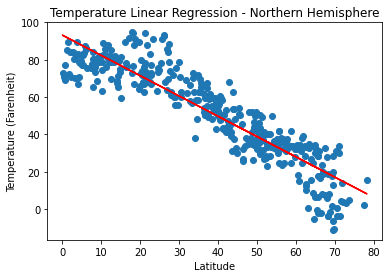

The r-value is: 0.8304711816772776


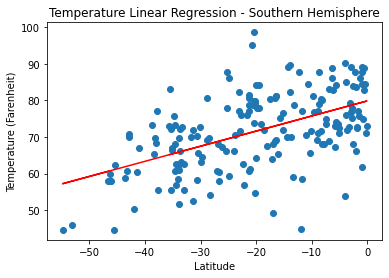

The r-value is: 0.28265780983318245


In [18]:
# Linear Regression - Temperature (Farenheit) v. Latitude (Northern Hemisphere)
x_values = northWeather_df['Latitude']
y_values = northWeather_df['Temperature']
plt.scatter(x_values, y_values)
plt.title('Temperature Linear Regression - Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Temperature (Farenheit)')
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
plt.savefig(f'visualizations/TempLinreg_North.png')
plt.show()
print(f"The r-value is: {rvalue**2}")

# Linear Regression - Temperature (Farenheit) v. Latitude (Southern Hemisphere)
x_values = southWeather_df['Latitude']
y_values = southWeather_df['Temperature']
plt.scatter(x_values, y_values)
plt.title('Temperature Linear Regression - Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Temperature (Farenheit)')
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
plt.savefig(f'visualizations/TempLinreg_South.png')
plt.show()
print(f"The r-value is: {rvalue**2}")

#### Humidity (%) Linear Regressions

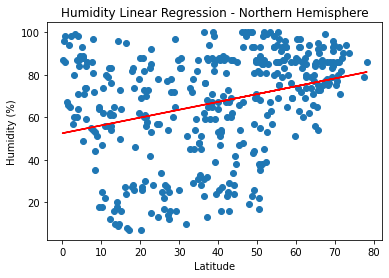

The r-value is: 0.09458169408229845


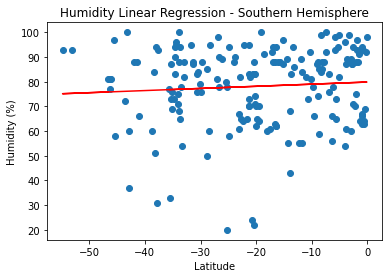

The r-value is: 0.005369286842502844


In [19]:
# Linear Regression - Humidity (%) v. Latitude (Northern Hemisphere)
x_values = northWeather_df['Latitude']
y_values = northWeather_df['Humidity']
plt.scatter(x_values, y_values)
plt.title('Humidity Linear Regression - Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
plt.savefig(f'visualizations/HumLinreg_North.png')
plt.show()
print(f"The r-value is: {rvalue**2}")

# Linear Regression - Humidity (%) v. Latitude (Southern Hemisphere)
x_values = southWeather_df['Latitude']
y_values = southWeather_df['Humidity']
plt.scatter(x_values, y_values)
plt.title('Humidity Linear Regression - Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
plt.savefig(f'visualizations/HumLinreg_South.png')
plt.show()
print(f"The r-value is: {rvalue**2}")

#### Cloudiness (%) Linear Regression

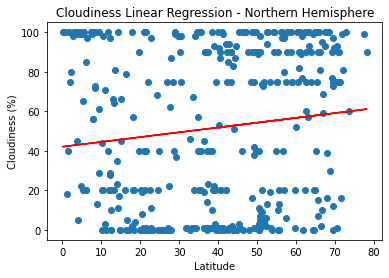

The r-value is: 0.015727150259198006


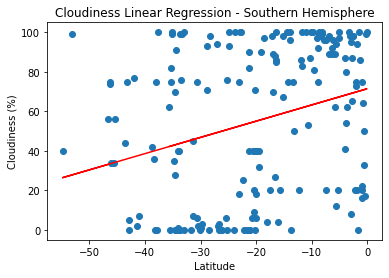

The r-value is: 0.08389308628209748


In [20]:
# Linear Regression - Cloudiness (%) v. Latitude (Northern Hemisphere)
x_values = northWeather_df['Latitude']
y_values = northWeather_df['Cloudiness']
plt.scatter(x_values, y_values)
plt.title('Cloudiness Linear Regression - Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
plt.savefig(f'visualizations/CloudLinreg_North.png')
plt.show()
print(f"The r-value is: {rvalue**2}")

# Linear Regression - Cloudiness (%) v. Latitude (Southern Hemisphere)
x_values = southWeather_df['Latitude']
y_values = southWeather_df['Cloudiness']
plt.scatter(x_values, y_values)
plt.title('Cloudiness Linear Regression - Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
plt.savefig(f'visualizations/CloudLinreg_South.png')
plt.show()
print(f"The r-value is: {rvalue**2}")

#### Wind Speed (mph) Linear Regressions

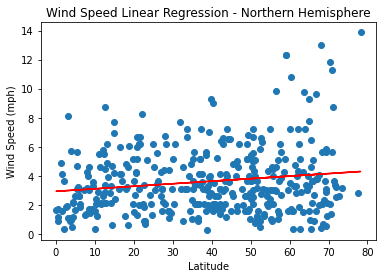

The r-value is: 0.025086587310262178


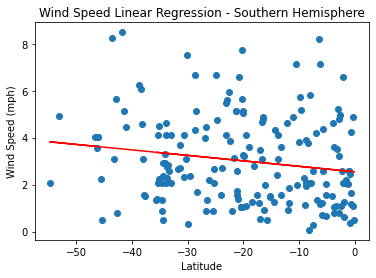

The r-value is: 0.028179199760096987


In [21]:
# Linear Regression - Wind Speed (mph) v. Latitude (Northern Hemisphere)
x_values = northWeather_df['Latitude']
y_values = northWeather_df['Wind (MPH)']
plt.scatter(x_values, y_values)
plt.title('Wind Speed Linear Regression - Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
plt.savefig(f'visualizations/WindLinreg_North.png')
plt.show()
print(f"The r-value is: {rvalue**2}")

# Linear Regression - Wind Speed (mph) v. Latitude (Southern Hemisphere)
x_values = southWeather_df['Latitude']
y_values = southWeather_df['Wind (MPH)']
plt.scatter(x_values, y_values)
plt.title('Wind Speed Linear Regression - Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
plt.savefig(f'visualizations/WindLinreg_South.png')
plt.show()
print(f"The r-value is: {rvalue**2}")

#### Save Data Frames as CSVs

In [22]:
# Weather Data Frame
weather_df_csv = weather_df.to_csv(index=True)
weatherData_csv = open("data/weather_df.csv", "w", encoding='utf-8')
weatherData_csv.write(weather_df_csv)
weatherData_csv.close()

In [23]:
# Northern Hemisphere - Weather Data Frame
northWeather_df_csv = northWeather_df.to_csv(index=True)
northWeatherData_csv = open("data/northWeather_df.csv", "w", encoding='utf-8')
northWeatherData_csv.write(northWeather_df_csv)
northWeatherData_csv.close()

In [24]:
# Southern Hemisphere - Weather Data Frame
southWeather_df_csv = southWeather_df.to_csv(index=True)
southWeatherData_csv = open("data/southWeather_df.csv", "w", encoding='utf-8')
southWeatherData_csv.write(southWeather_df_csv)
southWeatherData_csv.close()